###                                       AI and ML Techniques for Cyber Security (S1-23_AIMLCZG567)
### Purushotham K (2022ac05108)
### AIML

## Overall Process: 
Intuition behind model generation is to detect the malicious Url that causes exploits and unauthorized access of the user system through rua(remote User Access).
The Building of the model involves data cleaning & feature extraction then finding out the important labels based on the heat map and the labels with high correlation is taken into consideration and proceed with the choosing of the algorithm in my case I go with the Random forest algorithm that is more accurate with the decision making.
The dataset contains to many labels so with keep the high correlation one and split the dataset into two parts namely training data and testing data both in the ratio of about 70:30 ratio to make the training more accurate
finally calculating the performance of the model based on the precision recall & f-score
The major thing is the confusion matrix that depict the overall model standard and performance 


## solution approach:
  To detect the Maliciour Url  the decision process must be accurate and it must not be overfit to the dataset and  having the generalization of the model with variance and bais .
  The second dataset consists of 1353 URLs with 17 features, and these URLs are classified into 3 categories: Phishing, non-phishing and suspicious. We are going to make use of both of these datasets.
The first thing to do after the datasets are obtained is data slicing. Here, we divide the datasets into two parts: testing dataset and training dataset. The training dataset is used to train a model. The testing dataset is only used once the trained model is ready. Once the model is trained, we test its accuracy on the testing dataset.
By considering all the circumstances decided to go with the Random forest algorithm which have multiple levels of decision tree that generalize the data with no.of classifiers .
by using the scikit-learn module importing the randomforest with max_level of atleast 5 .
train the model with high correlation labels to achieve atleast 80% accuracy over the testing dataset.


## ML_Model Used & Reason for using it:
For the Phishing URL detection I used the random forest algorithm. RandomForest is a best suite for the decision making in the Phishing URL detection since it is a supervised machine learning algorithm that is used to perform both regression and classification task in data mining. It is an ensemble based technique that can be used to perform classification. It makes use of a number of classification trees (like decisiontrees) and then gives the final result. In our case it is important to decide the legitimate URL detection and report the phishing URL
This algorithm works by creating a number of classification trees randomly. These trees are created by making use of different samples from the same dataset and
also they may use different types of features each time to create the trees. Thus, all the trees are created randomly by making use of different sub sets of the same dataset. Also
the features are taken randomly for the creation of any tree. By doing so, Random Forest ensures that it does not overfit the data, as in the case of the decision trees. Once the trees have been formed, we can do the classification by finding the results of each tree and then assigning it to the class that
has been determined by the most number of trees that makes the decision more accurately and detect the  malicious URL accurately so I go with the Random Forest Algorithm


## 1	Data Preparation


here we imported all the nessary packages that are required to create a ML model

In [27]:
#importing basic packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

Importing the Phishing-Url_DataSet 
and loading the data displauing the top 10 items in the list
import the dataset using the pandas library and check the sample entries in the dataset

In [28]:
#Loading the data
url_data = pd.read_csv('5.urldata.csv')
url_data.head()

,Domain,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,graphicriver.net,0,0,1,1,0,0,0,0,0,1,1,1,0,0,1,0,0
1,ecnavi.jp,0,0,1,1,1,0,0,0,0,1,1,1,0,0,1,0,0
2,hubpages.com,0,0,1,1,0,0,0,0,0,1,0,1,0,0,1,0,0
3,extratorrent.cc,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0
4,icicibank.com,0,0,1,3,0,0,0,0,0,1,0,1,0,0,1,0,0



Information about the dataset

In [29]:

url_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   URL_Length     10000 non-null  int64 
 4   URL_Depth      10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   https_Domain   10000 non-null  int64 
 7   TinyURL        10000 non-null  int64 
 8   Prefix/Suffix  10000 non-null  int64 
 9   DNS_Record     10000 non-null  int64 
 10  Web_Traffic    10000 non-null  int64 
 11  Domain_Age     10000 non-null  int64 
 12  Domain_End     10000 non-null  int64 
 13  iFrame         10000 non-null  int64 
 14  Mouse_Over     10000 non-null  int64 
 15  Right_Click    10000 non-null  int64 
 16  Web_Forwards   10000 non-null  int64 
 17  Label          10000 non-null  int64 
dtypes: int64(17), object(1)
mem

# 2	Data Preprocessing:

Here, we clean the data by applying data preprocesssing techniques and transform the data to use it in the models.

Removing the non-numeri colums and missing colums present in the dataset along with the conversion of the object type colums to numeric colums to be consistent along the way





In [30]:


# Display non-numeric columns
non_numeric_columns = url_data.select_dtypes(exclude=['number']).columns
print("Non-numeric columns:", non_numeric_columns)

# Drop non-numeric columns
data_numeric = url_data.select_dtypes(include=['number'])

# Drop rows with missing values
data_numeric = data_numeric.dropna()

# Convert object-type columns to numeric
data_frame= data_numeric.apply(pd.to_numeric, errors='coerce')

Non-numeric columns: Index(['Domain'], dtype='object')


Plotting the data distribution for all the labels present in the dataset 

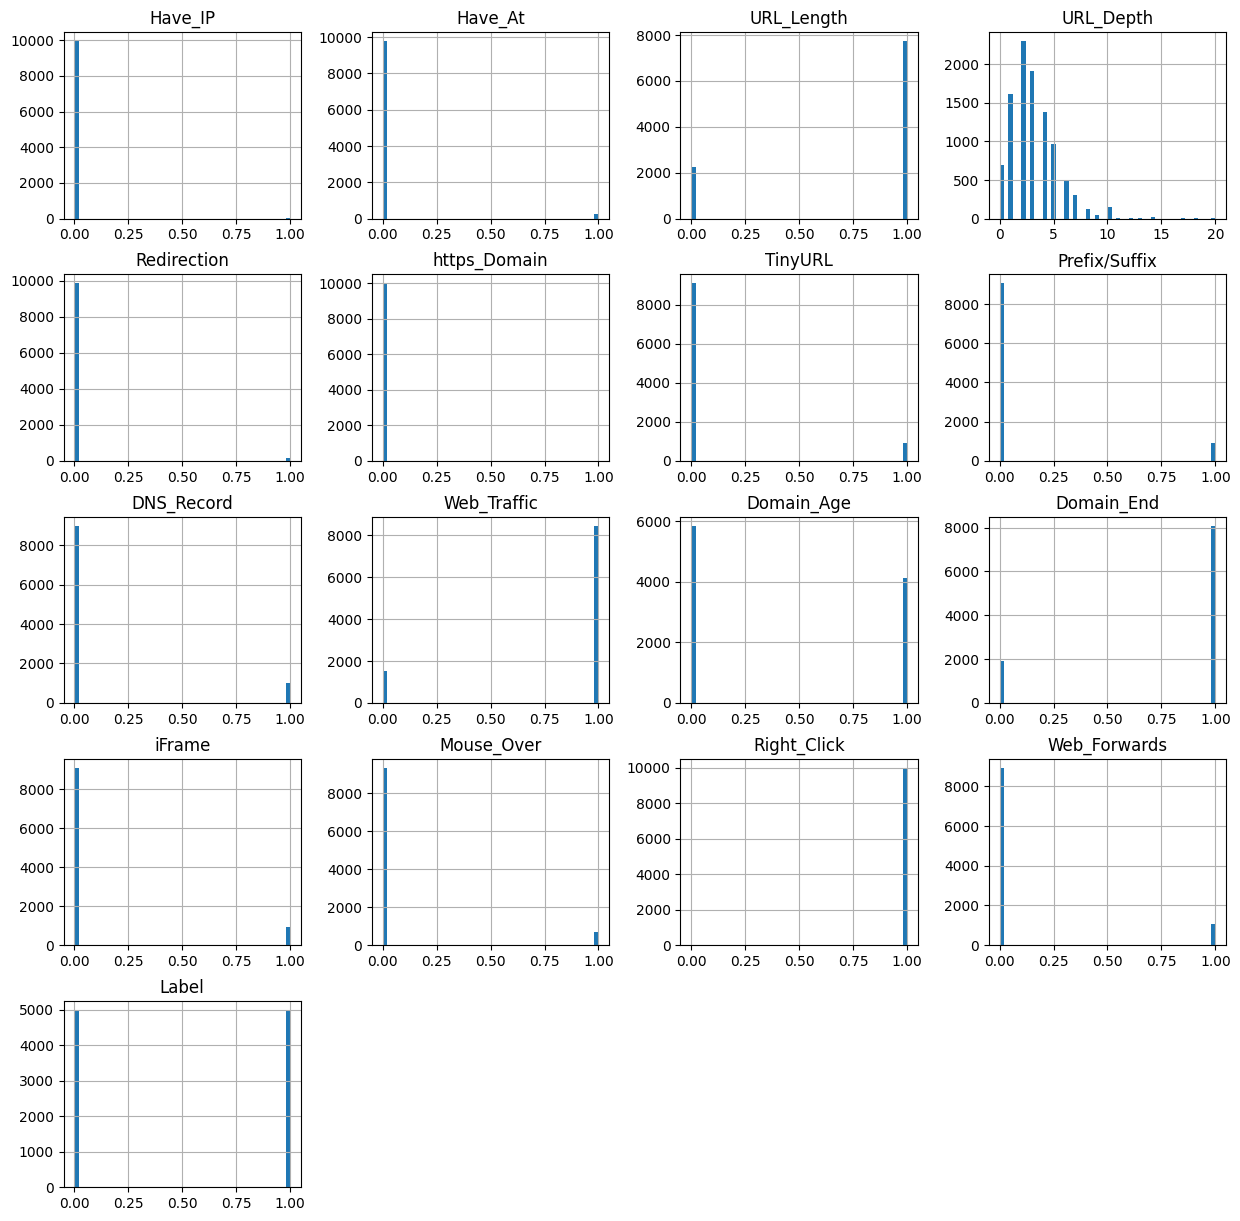

In [31]:
#Plotting data with the labels
data_frame.hist(bins = 50,figsize = (15,15))
plt.show()

the Heatmap shows the correlation between the data lables and the data frames.domain end and domain age has the high correlation among all the lables the data-frame correlation within the heatmap in the plot show.

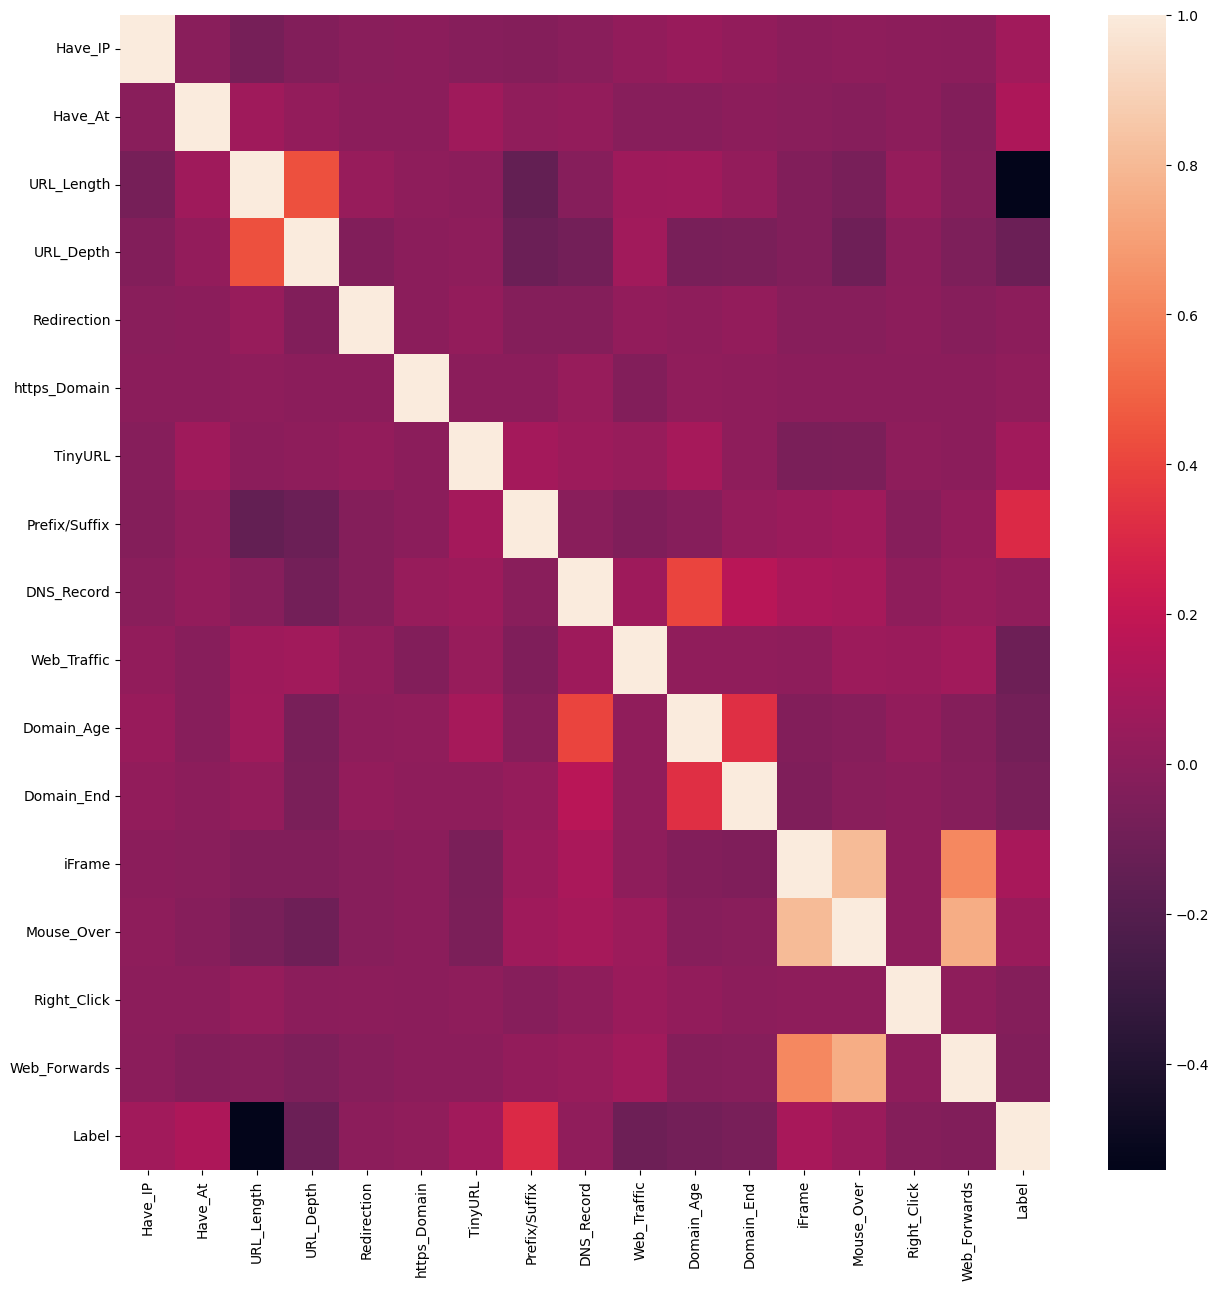

In [32]:


# Correlation heatmap
plt.figure(figsize=(15, 15))
sns.heatmap(data_frame.corr())
plt.show()


### 3. EDA
Extract relevant features from URLs and email content. 
Transform URLs and email content into numerical representations 
we are shuffling the dataset rows such that when you split it for the training and testing it would be more accurate 
here we converted all the data into the form of the numeric format

As per the short_url distribution, we can observe that benign URLs have the highest short URLs as we know that generally, we use URL shortening services for easily sharing long-length URLs.

In [33]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data_frame.sample(frac=1).reset_index(drop=True)
data.head()
# data_frame.describe()

,Have_IP,Have_At,URL_Length,URL_Depth,Redirection,https_Domain,TinyURL,Prefix/Suffix,DNS_Record,Web_Traffic,Domain_Age,Domain_End,iFrame,Mouse_Over,Right_Click,Web_Forwards,Label
0,0,0,0,0,0,0,1,1,0,1,0,1,1,1,1,1,1
1,0,0,1,7,0,0,0,0,0,1,1,1,0,0,1,0,0
2,0,0,1,5,0,0,1,0,0,0,0,1,0,0,1,0,1
3,0,0,1,3,0,0,0,0,0,1,1,1,0,0,1,0,0
4,0,0,1,3,0,0,0,0,0,1,1,0,0,0,1,0,1


Splitting the Data


In [34]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)
X.shape, y.shape

((10000, 16), (10000,))

While traing the model it is requires to split the dataset into train and test for the best prediction ,
it is a best practice to split the data into 80:20 ratio so that the 80% of the training data and 20% of the testing data 
to feed into the Random forest algorithm

In [35]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 16), (2000, 16))

### 5.Model Slection 
here we are using RandomForest algorithm for training the model from the scikit-learn 
taking the maximum depth of about 5 levels .


In [37]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

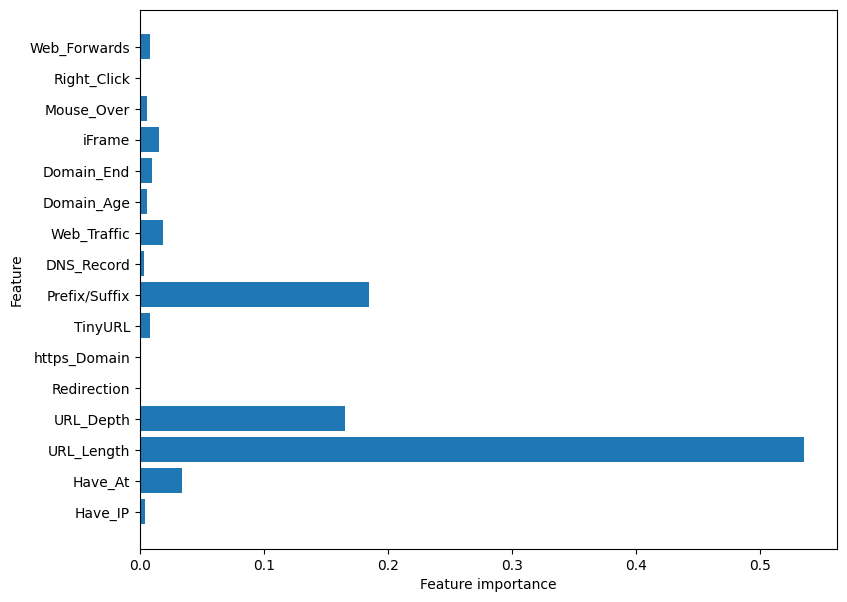

In [47]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [38]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [39]:
#importing packages
from sklearn.metrics import accuracy_score
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: ",acc_train_forest)
print("Random forest: Accuracy on test Data: ",acc_test_forest)

Random forest: Accuracy on training Data:  0.82275
Random forest: Accuracy on test Data:  0.8


### 6. Model Performance and evaluation of the Random forest


evaluating the precision,recall & the f1-score for the train and test data in Random forest

plotting the confusion matrix with the metaplot


RandomForest: Precision: 0.988
RandomForest: Recall: 0.626
RandomForest: F1-score: 0.767


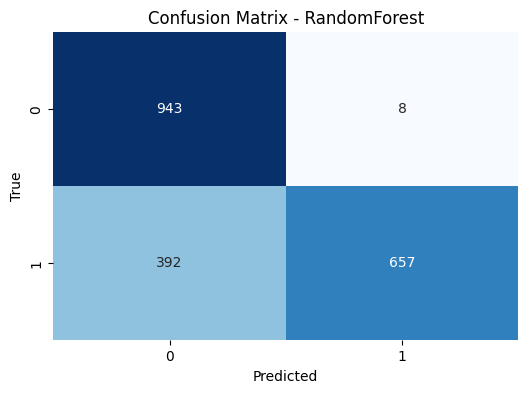

In [40]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_test_forest)
recall_svm = recall_score(y_test, y_test_forest)
f1_svm = f1_score(y_test, y_test_forest)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_forest)

# Print precision, recall, and F1-score
print("RandomForest: Precision: {:.3f}".format(precision_svm))
print("RandomForest: Recall: {:.3f}".format(recall_svm))
print("RandomForest: F1-score: {:.3f}".format(f1_svm))

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - RandomForest")
plt.show()


Plotting the performance of both the training and the tesing dataset by the Random forest algorithm.

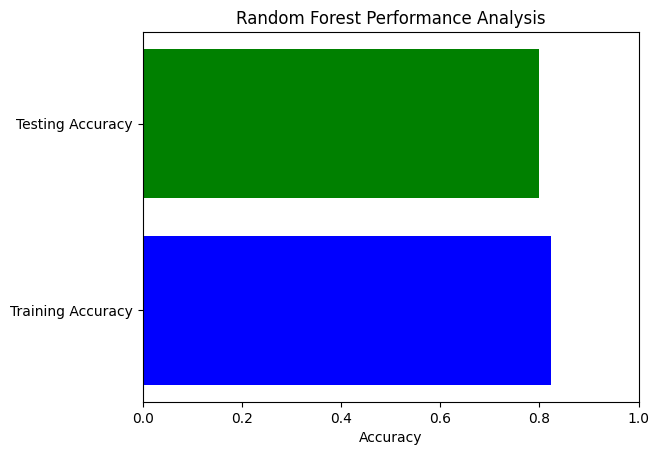

In [41]:
import matplotlib.pyplot as plt

# Data
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [acc_train_forest, acc_test_forest]

# Create horizontal bar plot
plt.barh(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Accuracy')
plt.title('Random Forest Performance Analysis')
plt.xlim(0, 1)  # Set x-axis limit to match accuracy scale (0 to 1)
plt.show()


From the above result, it is given that Random Forest shows the best performance in terms of test accuracy as it attains the highest accuracy of 80.02% with a higher detection rate for benign, defacement, phishing, and malware.

So based on the above performance, we have selected Random Forest as our main model for detecting malicious URLs and in the next step, we will also plot the feature importance plot.

## Alternate Model for the phishing Url detection

Support Vector Machines

In machine learning, support-vector machines (SVMs, also support-vector networks) are supervised learning models with associated learning algorithms that analyze data used for classification and regression analysis. Given a set of training examples, each marked as belonging to one or the other of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier.

In [42]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [43]:
#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [44]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.805
SVM : Accuracy on test Data: 0.792


The precison recall and the F1-score for the SVM by the metrics of the sklearn module.
confusion matrix of the dataset performed on SVM algorithm 

SVM: Precision: 0.972
SVM: Recall: 0.622
SVM: F1-score: 0.758


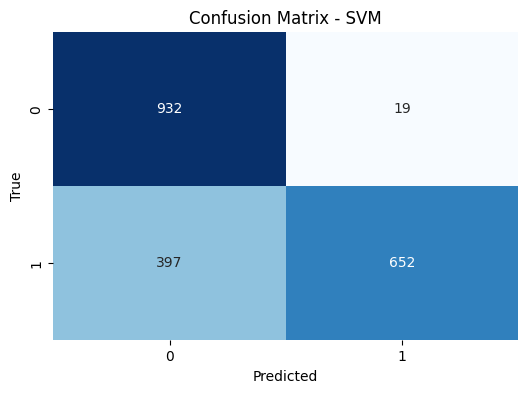

In [45]:


# Calculate precision, recall, and F1-score
precision_svm = precision_score(y_test, y_test_svm)
recall_svm = recall_score(y_test, y_test_svm)
f1_svm = f1_score(y_test, y_test_svm)

# Generate confusion matrix
conf_matrix_svm = confusion_matrix(y_test, y_test_svm)

# Print precision, recall, and F1-score
print("SVM: Precision: {:.3f}".format(precision_svm))
print("SVM: Recall: {:.3f}".format(recall_svm))
print("SVM: F1-score: {:.3f}".format(f1_svm))

# confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_svm, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - SVM")
plt.show()


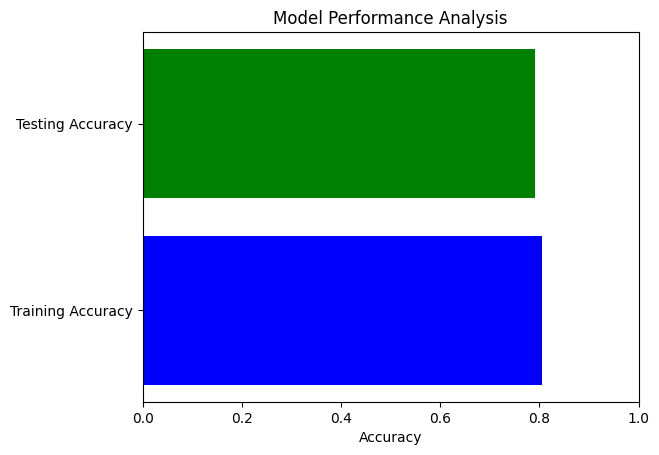

In [46]:
import matplotlib.pyplot as plt

# Data
labels = ['Training Accuracy', 'Testing Accuracy']
accuracies = [acc_train_svm, acc_test_svm]

# bar plot
plt.barh(labels, accuracies, color=['blue', 'green'])
plt.xlabel('Accuracy')
plt.title('Model Performance Analysis')
plt.xlim(0, 1)  
plt.show()


The Performance of the SVM model not upto the mark for th test data when compared the Random forest algorithm it uses linear kernal to determine the Phishing Url but the evaluation performance is not upto the mark it gives high in the training dataset but it comes to the test data not perfomed well

## Comparision of the Random Forest Algorithm and the SVM Algorithm


 Random forest algo is robust against overfitting, making it adept at handling noisy datasets that may be prevalent in the dynamic landscape of malicious URLs.it has multiple decision tree to deal with so it makes the prediction more accurate.
 on the another hand the SVM uses the kernal model so that it uses the hyperplane decision boundaries to deal with the dataset.

With SVM Linear algorithm, the most suitable value for the tuning parameter C was found to be 1.0. With this value,an accuracy of80.4% was obtained on the training datasetand an accuracy of 79.03% was obtained on the testing dataset.

When Random Forest algorithm was used on this dataset,the value of entry-depth=5 gave the highest accuracy on the
training dataset. The accuracy that was obtained was 81.02%. On the testing dataset, this model was able to give an accuracy of 80.01%. Thus, Random Forest performed better than the SVM linear algorithm, on the training and the testing dataset 





#### UsedModel: Random Forest
#### dataset: Phishing UrlDataset
#### Alternative Model: SVM 
#### comparision of the best model: Random forest 
#### performance:  Random forest
#### training accuracy: SVM
##### testing accuracy: RandomForest




## ADDITIONAL TASK

Multilayer perceptrons (MLPs) are also known as (vanilla) feed-forward neural networks, or sometimes just neural networks. Multilayer perceptrons can be applied for both classification and regression problems.

MLPs can be viewed as generalizations of linear models that perform multiple stages of processing to come to a decision.

In [48]:
# Multilayer Perceptrons model
from sklearn.neural_network import MLPClassifier

# instantiate the model
mlp = MLPClassifier(alpha=0.001, hidden_layer_sizes=([100,100,100]))

# fit the model
mlp.fit(X_train, y_train)

MLPClassifier(alpha=0.001, hidden_layer_sizes=[100, 100, 100])

In [49]:
#predicting the target value from the model for the samples
y_test_mlp = mlp.predict(X_test)
y_train_mlp = mlp.predict(X_train)

In [50]:
#computing the accuracy of the model performance
acc_train_mlp = accuracy_score(y_train,y_train_mlp)
acc_test_mlp = accuracy_score(y_test,y_test_mlp)

print("Multilayer Perceptrons: Accuracy on training Data: {:.3f}".format(acc_train_mlp))
print("Multilayer Perceptrons: Accuracy on test Data: {:.3f}".format(acc_test_mlp))

Multilayer Perceptrons: Accuracy on training Data: 0.863
Multilayer Perceptrons: Accuracy on test Data: 0.847


Multilayer Perceptrons: Precision: 0.970
Multilayer Perceptrons: Recall: 0.731
Multilayer Perceptrons: Confusion Matrix:
[[927  24]
 [282 767]]


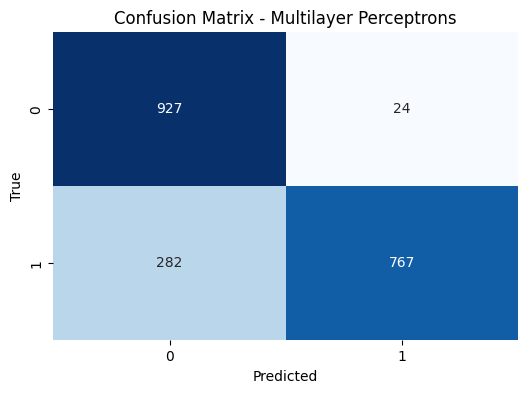

In [52]:

# Calculate precision, recall, and confusion matrix
precision_mlp = precision_score(y_test, y_test_mlp)
recall_mlp = recall_score(y_test, y_test_mlp)
conf_matrix_mlp = confusion_matrix(y_test, y_test_mlp)

# Print precision, recall, and confusion matrix
print("Multilayer Perceptrons: Precision: {:.3f}".format(precision_mlp))
print("Multilayer Perceptrons: Recall: {:.3f}".format(recall_mlp))
print("Multilayer Perceptrons: Confusion Matrix:")
print(conf_matrix_mlp)

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix_mlp, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - Multilayer Perceptrons")
plt.show()